
# Medical Appointment No Show Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> in this project i will analyze the Medical Appointment No Show data of 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [48]:
df = pd.read_csv('med_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [49]:
df.shape

(110527, 14)

In [50]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- We have 110527 records with patients had previous appointments

In [51]:
df.isnull().sum().sum()

0

No null values

In [52]:
df.duplicated().sum()

0

No duplicates

In [53]:
df['AppointmentDay'].min(), df['AppointmentDay'].max()

('2016-04-29T00:00:00Z', '2016-06-08T00:00:00Z')

The data is just for 2 months period

In [54]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>- We have spelling mistakes in the dataset
>- the -1 age is strange, needs more invstegate 
>- The most of appointment makers are between 30 to 60 years old
>- we wont need Appointment_id column in our analysis so we will drop it


### Data Cleaning

In [55]:
#Drop PatientId and AppointmentID columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
#Search for the -1 age record and dropping it
df[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [57]:
df.drop(index=99832, inplace=True)

In [58]:
#fixing columns names to be easier for analysis
df.rename(columns= lambda x: x.strip().lower().replace('-', '_'), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [59]:
# Convert ScheduledDay and AppointmentDay to datetime type
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date.astype('datetime64[ns]')
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date.astype('datetime64[ns]')
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [60]:
#Renaming columns
df.rename(columns={'handcap':'handicap'},inplace= True),
df.rename(columns = {'hipertension':'hypertension'},inplace = True),
df.rename(columns={'no_show': 'showed'}, inplace=True)

In [61]:
#Creating waiting days column
df['waiting_days'] = (df['appointmentday'].dt.date-df['scheduledday'].dt.date).dt.days
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,waiting_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [62]:
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholism                 int64
handicap                   int64
sms_received               int64
showed                    object
waiting_days               int64
dtype: object

In [63]:
#Here i found a human entry errors in the appoinment days
df['waiting_days'].min()

-6

In [64]:
#Dropping the non logical waiting days
wrong_negative_days = df.query('waiting_days < 0').index

In [65]:
df.drop(index=wrong_negative_days, inplace=True)

In [66]:
#Done ;)
df['waiting_days'].min()

0

In [67]:
#The data is distributed in 81 neighbourhoods so it's not for a specific neighbourhoods so it wont be useful to us for our analysis
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4430
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [68]:
#Changing 'showed' column values to numeric
df['showed'] = df['showed'].apply(lambda x: 1 if x=='Yes' else 0 )

In [69]:
#Dropping the columns which we wont use
df.drop(['scheduledday', 'appointmentday', 'neighbourhood'], axis=1, inplace=True)

In [70]:
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed,waiting_days
0,F,62,0,1,0,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0,0


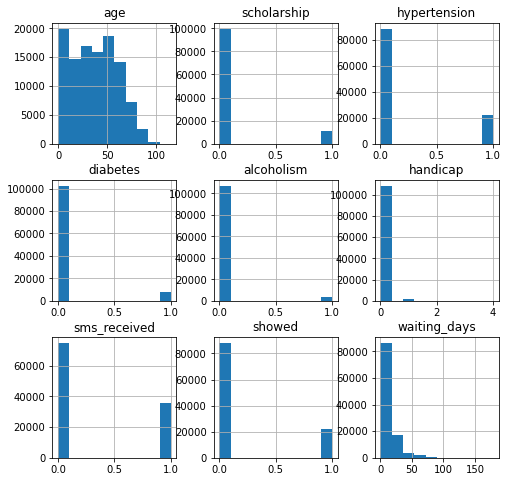

In [71]:
df.hist(figsize=(8,8));

In [72]:
#Handicap having wrong values which are 2,3 and 4, we will drop them
handicap_wrong = df.query('handicap > 1').index
df.drop(index= handicap_wrong, inplace=True)

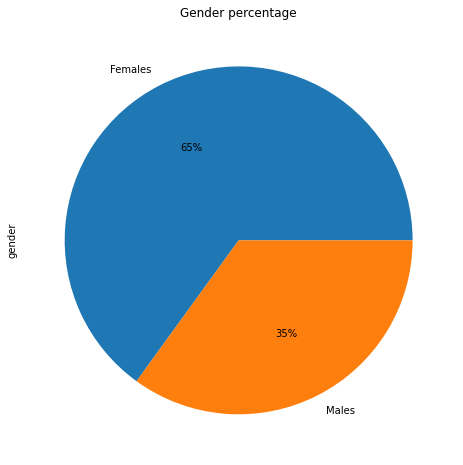

In [73]:
#Taking a look at the Male to Female ratio
df.gender.value_counts().plot(kind="pie", labels=["Females","Males"], autopct='%1.0f%%', figsize=(8, 8))
plt.title("Gender percentage");

<a id='eda'></a>
## Exploratory Data Analysis

> After cleaning the data now it's time to think about questions and visualizations.
The questions:
- Q1: Is there a relationship between the absence and the waiting days ?
- Q2: Does the age affect the show up ?
- Q3:  What is the most common disease for scheduled appointments ?
- Q4:Is Bolsa Familia scholarship associated with higher show rate?

### Q1: Is there a relationship between the absence and the waiting days ?

In [74]:
#exploring raw data for high waiting periods
print(df.waiting_days.mean())

10.18752379398488


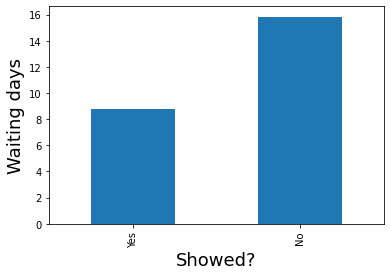

In [75]:
df.groupby('showed')['waiting_days'].mean().plot(kind='bar')
plt.xticks([0, 1], ['Yes', 'No'])
plt.xlabel('Showed?', fontsize=18)
plt.ylabel('Waiting days', fontsize=18);


- Patients who attend have a less waiting time than patients who don’t (expected).
- patients who didn't show up have an average of 15 days of waiting.
- patients who showed up have an average of 8 days of waiting.

### Q2: Does the age affect the show up ?

In [76]:
#Taking a look at age distribution
def user(df):
    df.hist(bins=25,figsize=(15,5))
    plt.xlabel("Age") 
    plt.ylabel("Count") 
    plt.title("Age histogram");

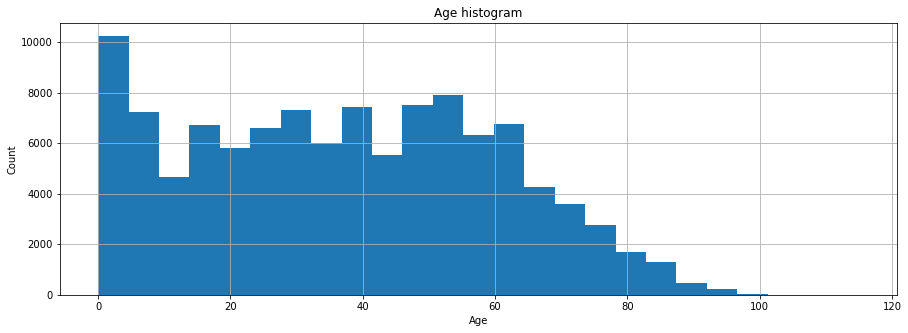

In [77]:
user(df['age'])

In [78]:
#Making masks for showed and not showed
showed_ppl = df['showed'] == 0
not_showed_ppl = df['showed'] == 1

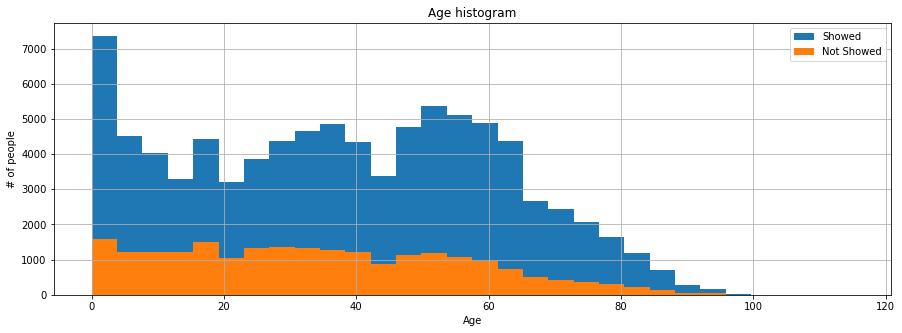

In [79]:
df[showed_ppl].age.hist(bins=30,label="Showed",figsize=(15,5) )
df[not_showed_ppl].age.hist(bins=30,label="Not Showed", figsize=(15,5))
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("# of people")
plt.legend();

- Older patients tends to show up more than younger ones
- 0 years old maybe are new born babies went for routine checks

### Q3: What is the most common disease for scheduled appointments ?

In [80]:
#Calculating proportion for hypertension
hypertension = df.hypertension.mean()*100
hypertension

19.684197168289188

In [81]:
#Calculating proportion for diabetes
diabetes = df.diabetes.mean()*100
diabetes

7.160856402168199

In [82]:
#Calculating proportion for alcoholism
alcoholism = df.alcoholism.mean()*100
alcoholism

3.038378564565545

In [83]:
#Calculating proportion for handicap
handicap = df.handicap.mean()*100
handicap

1.8491325392940665

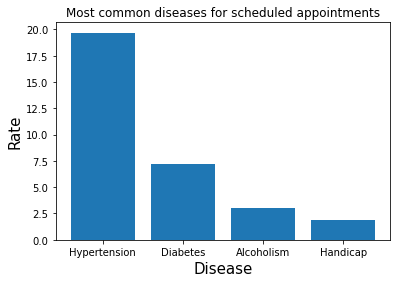

In [84]:
#Creating diseases rates
locations = [1, 2, 3, 4]
heights = [hypertension, diabetes, alcoholism, handicap]
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.bar(locations,heights);
plt.title('Most common diseases for scheduled appointments')
plt.xlabel('Disease', fontsize=15)
plt.ylabel('Rate', fontsize=15)
plt.xticks(locations, labels);

>Hypertension is the most common

### Q4: Is Bolsa Familia scholarship associated with higher show rate?

In [85]:
df.scholarship.value_counts()

0    99479
1    10843
Name: scholarship, dtype: int64

In [86]:
#Calculating proportion for people who doesn't have scholarship
no_scholarship = df.scholarship.value_counts()[0] / df.shape[0]
no_scholarship

0.9017149797864433

In [87]:
#Calculating proportion for people have scholarship
yes_scholarship = df.scholarship.value_counts()[1] / df.shape[0]
yes_scholarship

0.09828502021355667

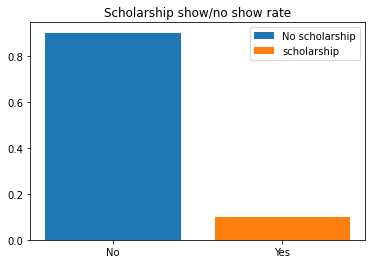

In [88]:
#Scholarship rate
no_scholarship_plot = plt.bar(0, no_scholarship, label='No scholarship' )
yes_scholarship_plot = plt.bar(1, yes_scholarship, label='scholarship')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Scholarship show/no show rate');
plt.legend();

- Most of the people doesn't have scholarship

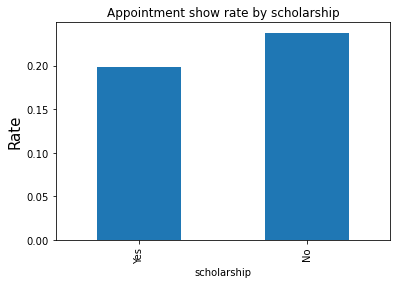

In [89]:
#Show rate for scholarship plot
df.groupby('scholarship')['showed'].mean().plot(kind='bar');
plt.xticks([0, 1], ['Yes', 'No'])
plt.title('Appointment show rate by scholarship')
plt.ylabel('Rate', fontsize=15);

- Scholarship doesn't affect the show up rate

<a id='conclusions'></a>
## Conclusions

- Patients who attend have a less waiting time than patients who don’t (expected).
- Patients who didn't show up have an average of 15 days of waiting.
- Ptients who showed up have an average of 8 days of waiting
- Older patients tends to show up more than younger ones
- Hypertension is the most common between made appointemnts
- Scholarship isn't a main reason for people to show up or not 

### Limitations
- The most age showed up was 0 years old which is strange, it maybe new born babies and maybe entry errors.
- Handicap had values of 1, 2, 3 and 4 after researching i found that it can be the disability level, but i removed 3 and 4 to     make it easier and more meaningful in our analysis 1 = there is handicap,  0 = no handicap.
- Neighbourhood feature could've be more useful if the data was targeted specific neighbourhoods not a general one.
- The data is for 2 months only 